## Project-1: Stock market prediction

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading  the Dataset

In [2]:
df_stock=pd.read_csv("infolimpioavanzadoTarget.csv")

In [3]:
df_stock

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0


In [4]:
# displaying the first few rows of the dataset
df_stock.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [5]:
# displaying the last few rows of the dataset
df_stock.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0
7780,2022-12-30,23.680000,23.760000,23.610001,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.760000,45.784072,41.002059,45.784072,41.002059,4.782013,0.482993,NaN,NaN,0


In [6]:
# display the basic information about the dataset
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


### Data cleaning

In [7]:
#descriptive statistics of numerical features
df_stock.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [8]:
# Checking the missing values
df_stock.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

### Visualising the Dataset

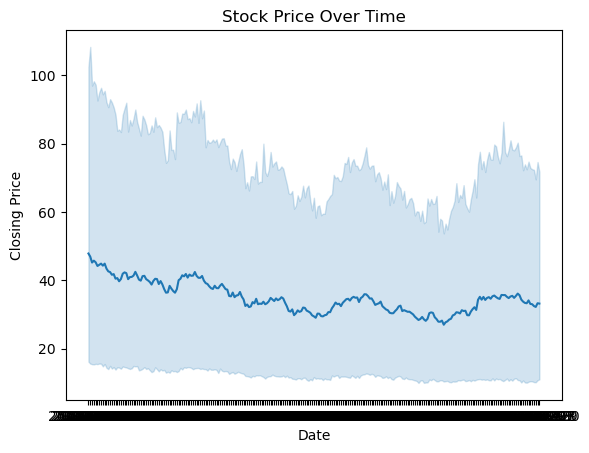

In [9]:
sns.lineplot(x='date', y='close', data=df_stock)
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### Predictive Modeling

In [14]:
# Extract the relevant features (e.g: date,open,close,volume)
features=df_stock[['date','open','close','volume']]

In [16]:
features.set_index('date', inplace=True)

### Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_size = int(len(features) * 0.8)
train_data, test_data = features.iloc[:train_size], features.iloc[train_size:]

### Regression models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Example: Linear Regression
model = LinearRegression()

# Train the model
model.fit(train_data.drop('close', axis=1), train_data['close'])

# Make predictions on the test set
predictions = model.predict(test_data.drop('close', axis=1))

# Evaluate the model
mse = mean_squared_error(test_data['close'], predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.6239429167221934
Root Mean Squared Error: 0.789900573947249
